In [1]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import os
from model import detr_simplified, DETR, DETRModel
from cornell_dataset import CornellDataset
from view_bbox import draw_bbox

In [2]:
model = DETRModel(num_classes=20, num_queries=8)
loaded_model = torch.load("model_4.ckpt")

model.load_state_dict(loaded_model["model"])
model.eval()
m = 0

Using cache found in /home/sbhara/.cache/torch/hub/facebookresearch_detr_main


In [3]:
from torch.utils.data import DataLoader 
dataset_path = "dataset/cornell"
img_set = "train"
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
inv_normalize = transforms.Normalize(
                            mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                            std=[1/0.229, 1/0.224, 1/0.225])
train_dataset = CornellDataset(dataset_path, "train", normalize)
val_dataset = CornellDataset(dataset_path, "val", normalize)

val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox).to("cpu")
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

In [4]:
def iou(box1,box2):
  '''
    Computes the intersection over union of two bounding boxes box = [x1,y1,x2,y2]
    where (x1, y1) and (x2, y2) are the top left and bottom right coordinates respectively
  '''
  x1, y1 = max(box1[0], box2[0]), max(box1[1], box2[1])
  x2, y2 = min(box1[2], box2[2]), min(box1[3], box2[3])
  inter_area = max(0, (x2 - x1 + 1)) * max(0, (y2 - y1 + 1))
  union_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1) + (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1) - inter_area
  return inter_area/union_area

/home/sbhara/Desktop/graspnet/GraspFormer/cornell_dataset.py:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gt_class_bbox = [torch.tensor(gt_class), torch.tensor(gt_bbox/224)]
/home/sbhara/.cache/torch/hub/facebookresearch_detr_main/models/position_encoding.py:41: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)


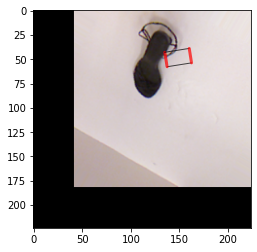

IOU: 0.0, GT: tensor([12], dtype=torch.int32), tensor([[153.4065, -13.9780, 184.3077,   3.9121]], dtype=torch.float64) Class: 10, bboxes: tensor([[135.9664,  40.6024, 161.4551,  55.6863]])


<Figure size 432x288 with 0 Axes>

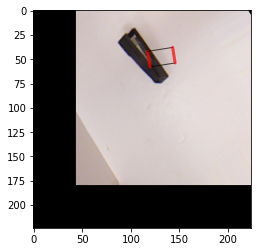

IOU: 0.11469528375641869, GT: tensor([6], dtype=torch.int32), tensor([[111.8168,  52.4598, 143.2926,  71.0225]], dtype=torch.float64) Class: 10, bboxes: tensor([[118.4157,  39.5978, 144.4409,  55.8387]])


<Figure size 432x288 with 0 Axes>

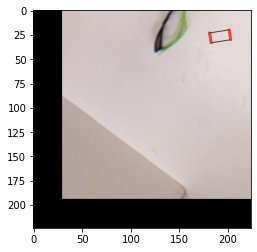

IOU: 0.0, GT: tensor([15], dtype=torch.int32), tensor([[139.6887,  24.9989, 154.7864,  36.8614]], dtype=torch.float64) Class: 10, bboxes: tensor([[181.7257,  21.1060, 202.1350,  31.3998]])


<Figure size 432x288 with 0 Axes>

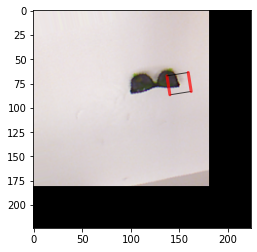

IOU: 0.2806405769353939, GT: tensor([3], dtype=torch.int32), tensor([[127.9509,  63.3032, 150.0671,  79.4652]], dtype=torch.float64) Class: 10, bboxes: tensor([[138.5324,  65.0953, 160.7367,  84.8858]])


<Figure size 432x288 with 0 Axes>

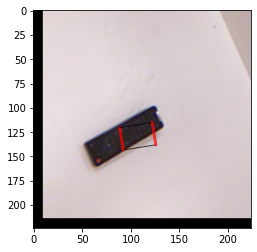

IOU: 0.05425231201083202, GT: tensor([16], dtype=torch.int32), tensor([[ 53.6949, 130.8634,  97.6443, 151.1477]], dtype=torch.float64) Class: 10, bboxes: tensor([[ 90.1737, 117.5077, 124.0655, 140.8317]])


<Figure size 432x288 with 0 Axes>

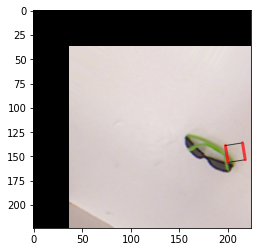

IOU: 0.0, GT: tensor([17], dtype=torch.int32), tensor([[156.5559, 129.5594, 170.0542, 151.7351]], dtype=torch.float64) Class: 10, bboxes: tensor([[198.6369, 137.2827, 216.5127, 154.8709]])


<Figure size 432x288 with 0 Axes>

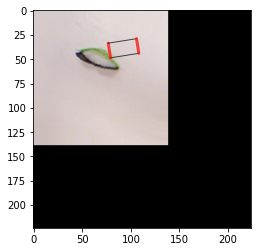

IOU: 0.0, GT: tensor([1], dtype=torch.int32), tensor([[49.6186, 46.3755, 63.4019, 57.7265]], dtype=torch.float64) Class: 10, bboxes: tensor([[ 77.6684,  30.8929, 107.1826,  46.1677]])


<Figure size 432x288 with 0 Axes>

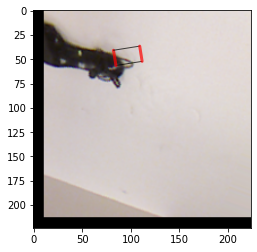

IOU: 0.0, GT: tensor([3], dtype=torch.int32), tensor([[56.6277, 53.3495, 75.8197, 68.0257]], dtype=torch.float64) Class: 10, bboxes: tensor([[ 83.1831,  38.3711, 110.4941,  54.2698]])


<Figure size 432x288 with 0 Axes>

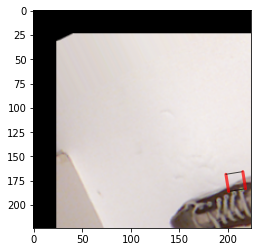

IOU: 0.0, GT: tensor([3], dtype=torch.int32), tensor([[143.3996, 201.4256, 156.7902, 213.7004]], dtype=torch.float64) Class: 10, bboxes: tensor([[199.1814, 166.8926, 216.8218, 184.7535]])


<Figure size 432x288 with 0 Axes>

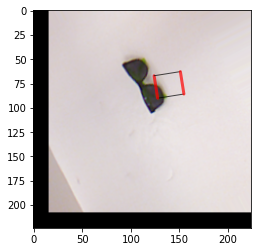

IOU: 0.0, GT: tensor([6], dtype=torch.int32), tensor([[ 93.2589,  51.4309, 119.0347,  69.2757]], dtype=torch.float64) Class: 10, bboxes: tensor([[125.5859,  64.5820, 152.9720,  87.9799]])
Mean IoU: 4.495881727026446, accuracy: 0.0


<Figure size 432x288 with 0 Axes>

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
final_iou = 0
correct_pred = 0
for i, (x_val, y_val) in enumerate(train_loader):
    x_val = x_val.to(device)
    box = y_val
    output = model(x_val)
    bbox = output["pred_boxes"]
    labels = output["pred_logits"]

    probas = labels.softmax(-1)
    #print( bbox * 224)
    probas = torch.argmax(probas, dim=2, keepdim=True)
    idx = torch.argmax(probas)

    pred_class = probas[:, idx].squeeze().cpu().numpy()
    bbox_pred = bbox[:, idx].detach().cpu() * 224

    x_val = inv_normalize(x_val)

    draw_func = draw_bbox(bbox_pred.squeeze(0).detach().cpu().numpy(), pred_class)
    draw_func.draw_rotated_box(x_val[0].permute(1, 2, 0).cpu().numpy())
    iou_calc = iou(y_val[1].squeeze(0).detach().cpu().numpy()*224, bbox_pred.squeeze(0).detach().cpu().numpy())
    final_iou += iou_calc
    if pred_class == y_val[0].numpy():
        correct_pred += 1

    print(f"IOU: {iou_calc}, GT: {y_val[0]}, {y_val[1]*224} Class: {pred_class}, bboxes: {bbox_pred}")
    i+=1
    if i == 10:
        print(f"Mean IoU: {final_iou/i * 100}, accuracy: {correct_pred/i * 100}")
        break
    